In [6]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(51.255407539501334, 76.34459246049866, 0.0, 0.1)

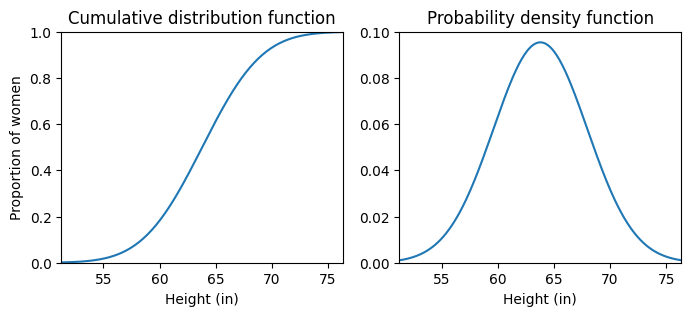

In [8]:
#Standart error = standart deviation/sqrt(n)
N = 4857
mean = 63.8
serror = 0.06
sdev = serror * np.sqrt(N)
rvnorm = st.norm(loc=mean, scale=sdev)
xmin = mean-3*sdev
xmax = mean+3*sdev
xx = np.linspace(xmin, xmax, 200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvnorm.cdf(xx))
plt.title('Cumulative distribution function')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvnorm.pdf(xx))
plt.title('Probability density function')
plt.xlabel('Height (in)')
plt.axis([xmin, xmax, 0.0, 0.1])

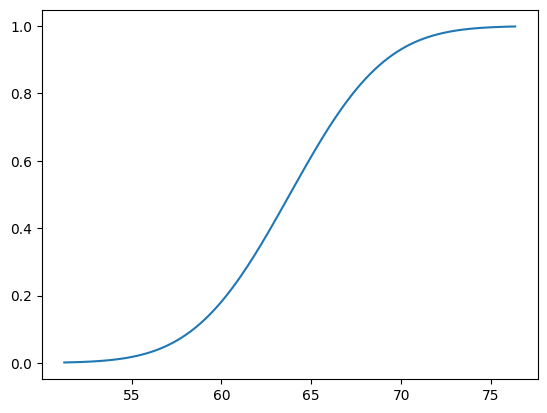

In [9]:
plt.plot(xx, rvnorm.cdf(xx))

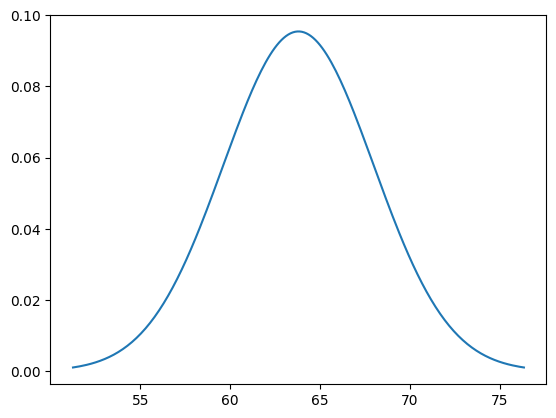

In [10]:
plt.plot(xx, rvnorm.pdf(xx))

In [11]:
rvnorm.cdf(68)

0.8424111333807798

In [12]:
rvnorm.cdf(63)

0.4241384277767544

In [13]:
100 * (rvnorm.cdf(68) - rvnorm.cdf(63))

41.82727056040253

In [14]:
categories = [
('Petite', 59, 63),
('Average', 63, 68),
('Tall', 68, 71),
]
for cat, vmin, vmax in categories:
    percent = 100 * (rvnorm.cdf(vmax) - rvnorm.cdf(vmin))
    print('{:>8s}: {:.2f}'.format(cat, percent))

  Petite: 29.86
 Average: 41.83
    Tall: 11.50


In [15]:
too_short = 100 * rvnorm.cdf(59)
too_tall = 100 * (1 - rvnorm.cdf(71))
unclassified = too_short + too_tall
print(too_short, too_tall, unclassified)

12.55038986608284 4.254767214713451 16.805157080796292


In [16]:
a = rvnorm.ppf(0.25)
b = rvnorm.ppf(0.75)
print(a, b)

60.97960032166886 66.62039967833113


In [17]:
mean, variance, skew, kurtosis = rvnorm.stats(moments='mvks')
print(mean, variance, skew, kurtosis)

63.8 17.485200000000003 0.0 0.0


In [18]:
eta = 1.0
beta = 1.5
rvweib = st.weibull_min(beta, scale=eta)

In [19]:
weib_variates = rvweib.rvs(size=500)
print(weib_variates[:10])

[0.60260646 0.44596817 1.67741162 0.29819105 0.61385881 1.27657964
 0.28452596 0.76345949 0.74005323 1.0962766 ]


array([[<AxesSubplot: title={'center': 'weibull_variate'}>]], dtype=object)

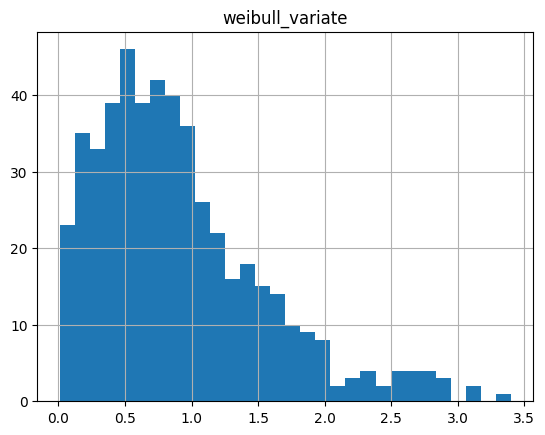

In [21]:
weib_df = pd.DataFrame(weib_variates,columns=['weibull_variate'])
weib_df.hist(bins=30)

NameError: name 'plot_cdf' is not defined

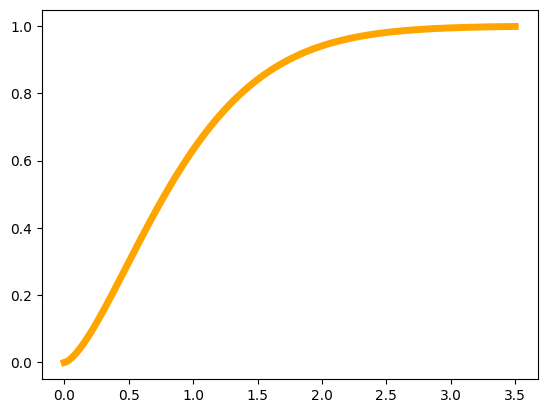

In [23]:
xmin = 0
xmax = 3.5
xx = np.linspace(xmin,xmax,200)
plt.plot(xx, rvweib.cdf(xx), color='orange', lw=5)
plot_cdf(weib_variates, plot_range=[xmin, xmax], scale_to=1, lw=2,color='green')
plt.axis([xmin, xmax, 0, 1])
plt.title('Weibul distribution simulation', fontsize=14)
plt.xlabel('Failure Time', fontsize=12)

In [24]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt',sep='\n', dtype=np.int64)
mean, std = st.norm.fit(wing_lengths)
print(mean, std)

FileNotFoundError: [Errno 2] No such file or directory: 'data/housefly-wing-lengths.txt'

In [25]:
st.probplot(wing_lengths, dist='norm', plot=plt)
plt.grid(lw=1.5, lw='dashed')

NameError: name 'wing_lengths' is not defined